In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [54]:
# Load the CSV file
file_path = 'Data.csv'  # Update this with your actual file path
df = pd.read_csv(file_path, sep=';').T
headers = df.iloc[0]
df  = pd.DataFrame(df.values[1:], columns=headers)
df_filtered = df.loc[df['Szenario'].isin(["Web(Patrick)","VR(Patrick)"])]

In [55]:
values = ["VR Experience","Navigation", "Information", "Immersive", "Engaging", "Fun", "Exploration", "Diversity"]

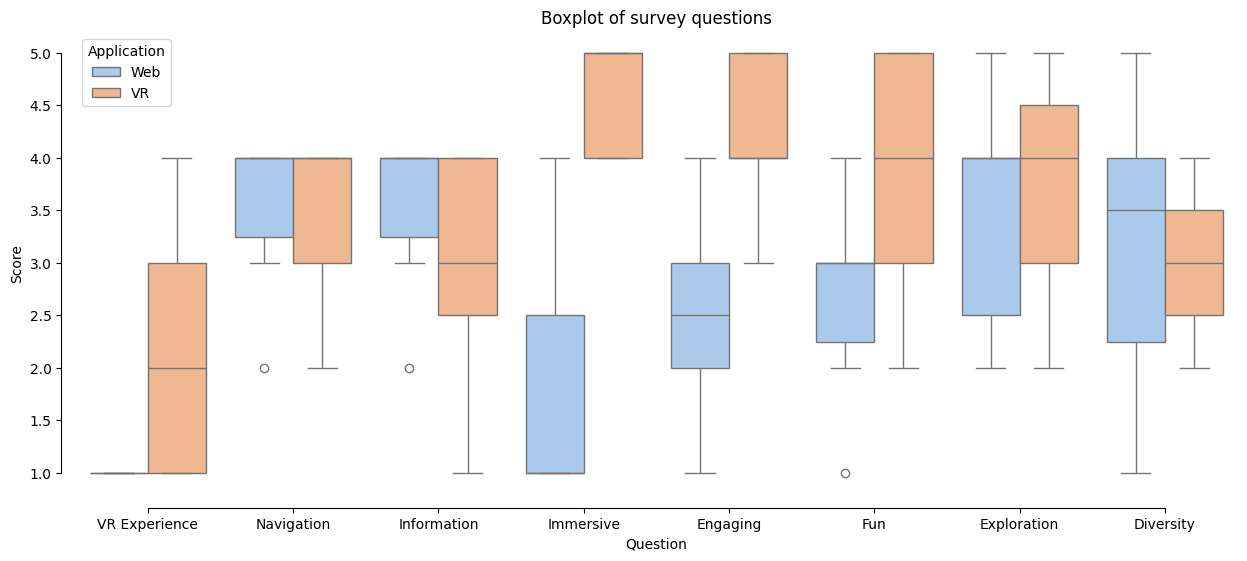

In [56]:
df_long = df_filtered.melt(id_vars='Szenario', 
                  value_vars=values, 
                  var_name='Question', 
                  value_name='Score')
df_long['Score'] = pd.to_numeric(df_long['Score'])
# Create the boxplot
plt.figure(figsize=(15, 6))

sns.boxplot(data=df_long, x='Question', y='Score', hue='Szenario', palette=sns.color_palette("pastel",2))
plt.title('Boxplot of survey questions')
sns.despine(offset=10, trim=True)
# change plot legend
plt.legend(title='Application')
# change plot handle 
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(loc='upper left', handles=handles[0:], labels=["Web", "VR"], title='Application')
plt.show()

In [57]:
df.loc[df['Szenario'].isin(["VR(Patrick)"])]

pd.to_numeric(df.loc[df['Szenario'].isin(["VR(Patrick)"])]["VR Experience"]).mean()

2.142857142857143

In [58]:
desc_vr = df.loc[df['Szenario'].isin(["VR(Patrick)"])]["Path Description"]
desc_web = df.loc[df['Szenario'].isin(["Web(Patrick)"])]["Path Description"]
vr_desc_lengths = []
web_desc_lengths = []
for i in [4, 6, 10, 12, 16, 18, 22]:
    value = desc_vr[i]
    # if value isnt string
    if not isinstance(value, str):
        vr_desc_lengths.append(0)
    else:
        vr_desc_lengths.append(len(value))
for i in [0, 2, 9, 15, 21, 25,31]:
    web_desc_lengths.append(len(desc_web[i]))
vr_desc_lengths = np.sort(vr_desc_lengths)
web_desc_lengths = np.sort(web_desc_lengths)

In [59]:
print(vr_desc_lengths)
print(web_desc_lengths)

[  0  62  66  67 176 190 315]
[105 111 144 182 205 221 328]


{'x': [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6], 'y': array([105, 111, 144, 182, 205, 221, 328,   0,  62,  66,  67, 176, 190,
       315]), 'type': ['Web', 'Web', 'Web', 'Web', 'Web', 'Web', 'Web', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR']}


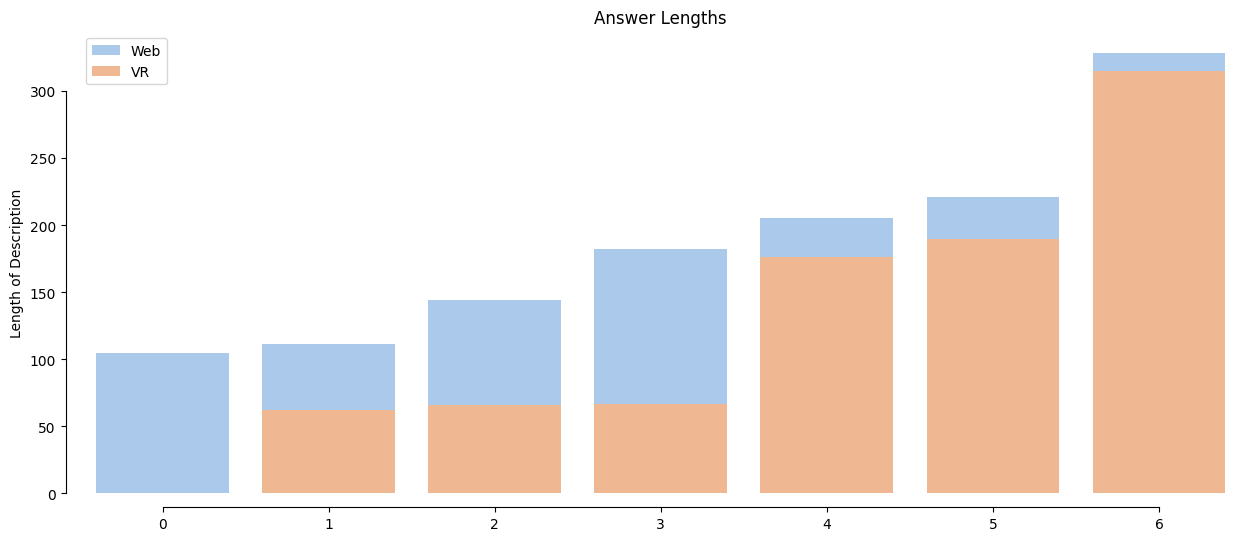

In [66]:
# plot both vr_desc lengths and web_desc lengths with seaborn as an overlapping plot
# sort arrays
data = {
    "x": [0,1,2,3,4,5,6] + [0,1,2,3,4,5,6],
    "y": np.concatenate((web_desc_lengths, vr_desc_lengths)),
    "type": ["Web" for i in range(7)] + ["VR" for i in range(7)]
}
print(data)
plt.figure(figsize=(15, 6))
sns.barplot(data=data,x='x', y='y', hue='type', dodge=False, palette=sns.color_palette("pastel",2))
sns.despine(offset=10, trim=True)
plt.ylabel('Length of Description')
plt.xlabel('')
plt.title('Answer Lengths')
plt.legend()
plt.show()


In [62]:
df.loc[df['Szenario'].isin(["Web(Patrick)"])]["Path Description"]

0     -> Intelligence conflict between the country d...
2     China, US, EU reach new conensus on cooperatio...
9     -> Geschichte -> Liste von K�mpfen bzw Schlach...
15    -> USE meet company enters Chinas consumer mar...
21    US-China enconomic tier exist and even strehgt...
25    America should invest in China-> Tiktok bans -...
31    US should stop assistance to Ukraine -> South ...
Name: Path Description, dtype: object